In [27]:
import scanpy as sc
import scanorama

In [28]:
heart_obj1 = sc.read_h5ad("./heart_obj1.h5ad")
heart_obj2 = sc.read_h5ad("./heart_obj2.h5ad")

**Without integration**

In [31]:
heart_obj = heart_obj1.concatenate(heart_obj2)
heart_obj

AnnData object with n_obs × n_vars = 184968 × 43878
    obs: 'user_id', 'study_id', 'cell_id', 'organ', 'region', 'subregion', 'seq_tech', 'sample_status', 'donor_id', 'donor_gender', 'donor_age', 'original_name', 'cl_name', 'hcad_name', 'tissue_type', 'cell_type', 'marker_gene', 'cid', 'batch'
    var: '0'

In [32]:
sc.pp.highly_variable_genes(heart_obj)
sc.tl.pca(heart_obj, svd_solver='arpack')
sc.pp.neighbors(heart_obj, n_neighbors=10, n_pcs=40)
sc.tl.umap(heart_obj)

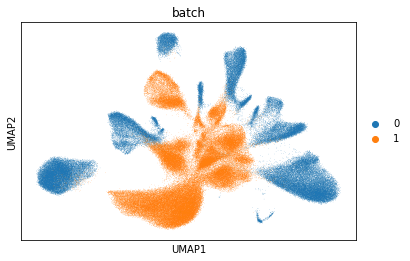

In [35]:
sc.pl.umap(heart_obj, color="batch")

**With Scanorama integration**

In [42]:
heart_obj1.X = heart_obj1.X.tocsr()
heart_obj2.X = heart_obj2.X.tocsr()
com_obj = [heart_obj1, heart_obj2]

In [44]:
scanorama.integrate_scanpy(com_obj, dimred = 50)

Found 43878 genes among all datasets
[[0.         0.11189228]
 [0.         0.        ]]
Processing datasets (0, 1)


Found 43878 genes among all datasets
[[0.         0.12472509]
 [0.         0.        ]]
Processing datasets (0, 1)


In [48]:
com_heart_obj = com_obj[0].concatenate(com_obj[1])

In [58]:
sc.pp.highly_variable_genes(com_heart_obj)
# sc.tl.pca(com_heart_obj, svd_solver='arpack')
sc.pp.neighbors(com_heart_obj, n_neighbors=10, n_pcs=40, use_rep="X_scanorama")
sc.tl.umap(com_heart_obj)

... storing 'cell_id' as categorical
... storing 'donor_id' as categorical
... storing 'donor_age' as categorical
... storing 'original_name' as categorical
... storing 'hcad_name' as categorical
... storing 'cell_type' as categorical
... storing 'marker_gene' as categorical


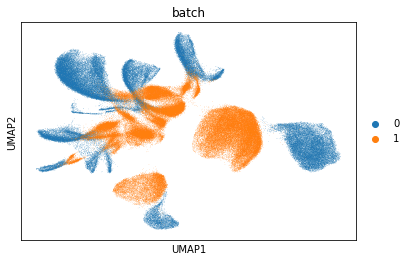

In [59]:
sc.pl.umap(com_heart_obj, color="batch")

In [ ]:
corrected = scanorama.correct_scanpy(com_obj, return_dimred=True)

In [83]:
corrected_heart_obj = corrected[0].concatenate(corrected[1])

In [84]:
# sc.pp.highly_variable_genes(corrected_heart_obj)
# sc.pp.normalize_total(corrected_heart_obj, target_sum=1e4)
# sc.pp.log1p(corrected_heart_obj)
sc.tl.pca(corrected_heart_obj, svd_solver='arpack')
sc.pp.neighbors(corrected_heart_obj, n_neighbors=10, n_pcs=40)
sc.tl.umap(corrected_heart_obj)

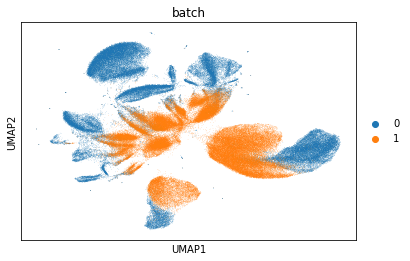

In [87]:
sc.pl.umap(corrected_heart_obj, color="batch")

In [75]:
import numpy as np
np.min(corrected[0].X.data)

-0.016403724

In [60]:
?sc.pp.highly_variable_genes

In [77]:
sc.pp.highly_variable_genes(heart_obj)
sc.pp.normalize_total(heart_obj, target_sum=1e4)
sc.pp.log1p(heart_obj)

In [78]:
heart_obj

AnnData object with n_obs × n_vars = 184968 × 43878
    obs: 'user_id', 'study_id', 'cell_id', 'organ', 'region', 'subregion', 'seq_tech', 'sample_status', 'donor_id', 'donor_gender', 'donor_age', 'original_name', 'cl_name', 'hcad_name', 'tissue_type', 'cell_type', 'marker_gene', 'cid', 'batch'
    var: '0', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'batch_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'